### exercise 8: support vector machines 

### task 3: support vectors in linear svc 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=40, centers=2, random_state=0)

In [3]:
clf_1 = LinearSVC(C=1, loss="hinge", random_state=1).fit(X, y)
clf_100 = LinearSVC(C=100, loss="hinge", random_state=1).fit(X, y)

C:\Users\chijunzhang\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [4]:
decision_function_1 = clf_1.decision_function(X)
# we can also calculate the decision function manually
# decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]

support_vector_indices_1 = np.where((2 * y - 1) * decision_function_1 <= 1)[0]
support_vectors_1 = X[support_vector_indices_1]

decision_function_100 = clf_100.decision_function(X)
support_vector_indices_100 = np.where((2 * y - 1) * decision_function_100 <= 1)[0]
support_vectors_100 = X[support_vector_indices_100]

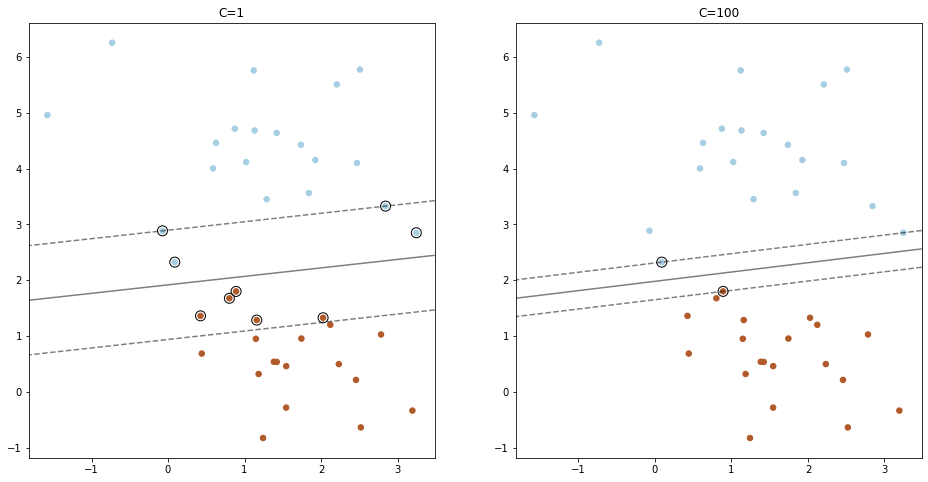

In [5]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf_1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(support_vectors_1[:, 0], support_vectors_1[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.title("C=1")


plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf_100.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(support_vectors_100[:, 0], support_vectors_100[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.title("C=100")

plt.show()